In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import manhattan_distances
from glob import glob
import matplotlib.pyplot as plt

In [14]:
csvs = glob('/n/data1/hms/dbmi/zitnik/lab/users/was966/ITRP/TCGA-ITRP-MERGE/735/*.csv')
csvs

['/n/data1/hms/dbmi/zitnik/lab/users/was966/ITRP/TCGA-ITRP-MERGE/735/itrp_tpm_combination_0000000000.pkl.score.csv']

In [15]:
dfs = []
for csv in csvs:
    df = pd.read_csv(csv, index_col=0)
    dfs.append(df)

In [16]:
df = pd.concat(dfs)
df['mean'] = df.prc*0.6 + df.roc*0.4
df = df.sort_values('mean', ascending=False)
df = df[(df.roc > 0.62) & (df.prc > 0.60)]

In [17]:
df1 = df
df2 = pd.DataFrame(df1.index.map(lambda x:x.split(' - ')).tolist(), index=df1.index)
df2.columns = ['g1', 'g2']
df1 = df1.join(df2)
df1['g1_count'] = df1.g1.map(df1.g1.value_counts())
df1['g2_count'] = df1.g2.map(df1.g2.value_counts())
df1

,prc,roc,mean,g1,g2,g1_count,g2_count
gene_name,,,,,,,
SLAMF6 - ATG12,0.630672,0.667239,0.645298,SLAMF6,ATG12,2,21
TIGIT - ATG12,0.627071,0.671157,0.644706,TIGIT,ATG12,1,21
STAT4 - ATG12,0.632244,0.656086,0.641781,STAT4,ATG12,1,21
SLAMF7 - IL10,0.624713,0.664109,0.640471,SLAMF7,IL10,13,2
SLAMF7 - ATG12,0.610292,0.685487,0.640370,SLAMF7,ATG12,13,21
...,...,...,...,...,...,...,...
CLEC4C - FEZ1,0.600398,0.638028,0.615450,CLEC4C,FEZ1,1,20
CCR6 - FEZ1,0.609618,0.623404,0.615132,CCR6,FEZ1,1,20
CD247 - XCR1,0.600138,0.633394,0.613440,CD247,XCR1,6,1


In [57]:
df1.g1.unique().shape

(268,)

In [58]:
df1.g2.unique().shape

(804,)

In [67]:
df1[df1.g1=='IL6R']

,prc,roc,mean,g1,g2,g1_count,g2_count
gene_name,,,,,,,
IL6R - CTNNA1,0.639905,0.678000,0.655143,IL6R,CTNNA1,74,16
IL6R - SMAD5,0.625370,0.689054,0.650844,IL6R,SMAD5,74,17
IL6R - RER1,0.627651,0.679235,0.648285,IL6R,RER1,74,6
IL6R - WDFY3,0.624518,0.681589,0.647346,IL6R,WDFY3,74,20
IL6R - OXR1,0.622721,0.676372,0.644181,IL6R,OXR1,74,3
...,...,...,...,...,...,...,...
IL6R - AIMP1,0.600683,0.638071,0.615638,IL6R,AIMP1,74,1
IL6R - TM9SF4,0.604791,0.631670,0.615542,IL6R,TM9SF4,74,1
IL6R - ETF1,0.605667,0.628516,0.614807,IL6R,ETF1,74,2


In [18]:
import sys,os
sys.path.insert(0, '/home/was966/Research/PSOG/')
from gdd.correlation import pairwise_correlation
from gdd.combination import pairwise_combination
from gdd.score import Xy_score
from gdd.plot import plot_batch
BEST = ['PIK3CD', 'TOLLIP']
import seaborn as sns
sns.set(style = 'white', font_scale=1.5)

data_path = '/n/data1/hms/dbmi/zitnik/lab/users/was966/ITRP/TCGA-ITRP-MERGE/735/'

tcga_tpm = pd.read_pickle(os.path.join(data_path, 'TPM.TCGA.TABLE'))
itrp_tpm = pd.read_pickle(os.path.join(data_path, 'TPM.ITRP.TABLE'))
itrp_tpm_crt = pd.read_pickle(os.path.join(data_path, 'TPM.ITRP.TABLE.CORRECT'))

tcga_patient = pd.read_pickle(os.path.join(data_path, 'PATIENT.TCGA.TABLE'))
tcga_patient['cohort'] = tcga_patient.cancer_type
itrp_patient = pd.read_pickle(os.path.join(data_path, 'PATIENT.ITRP.TABLE'))
gene = pd.read_pickle(os.path.join(data_path, 'GENE.TABLE'))

dfp1 = itrp_tpm.join(itrp_patient.cohort)
dfp2 = tcga_tpm.join(tcga_patient.cohort)
dfp2 = dfp2[dfp2.cohort == 'TCGA-SKCM']
dfp = pd.concat([dfp1, dfp2])

100%|##########| 1/1 [00:00<00:00, 928.35it/s]


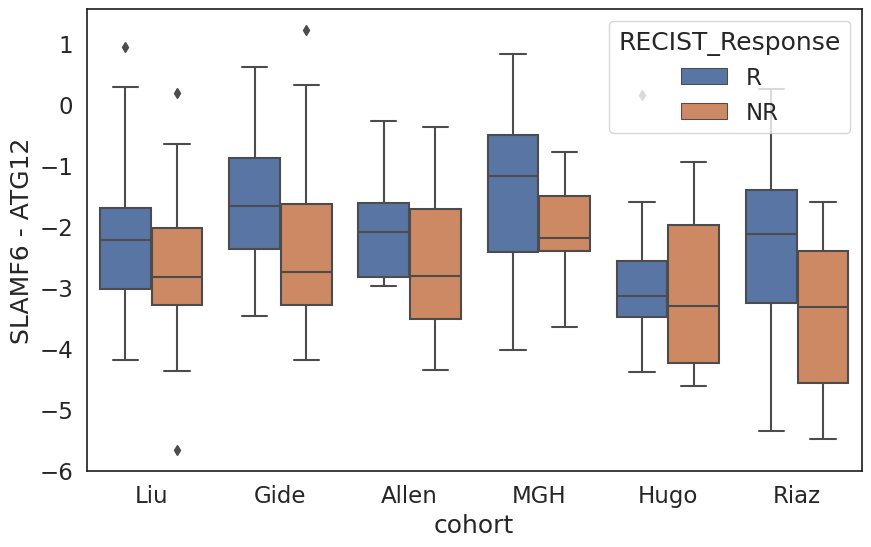

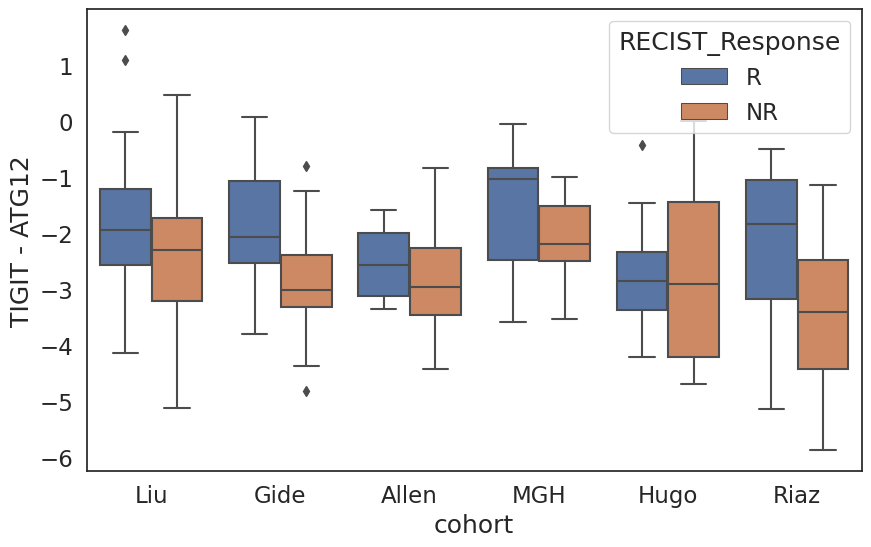

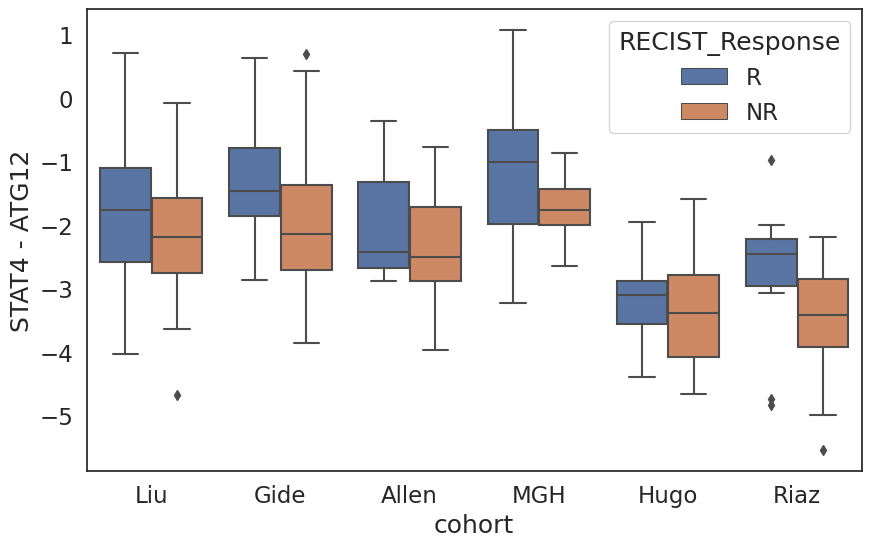

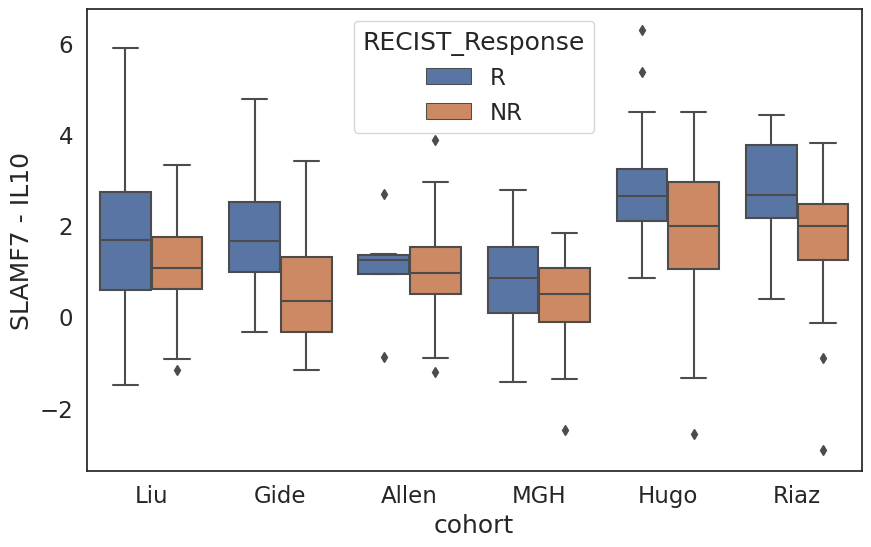

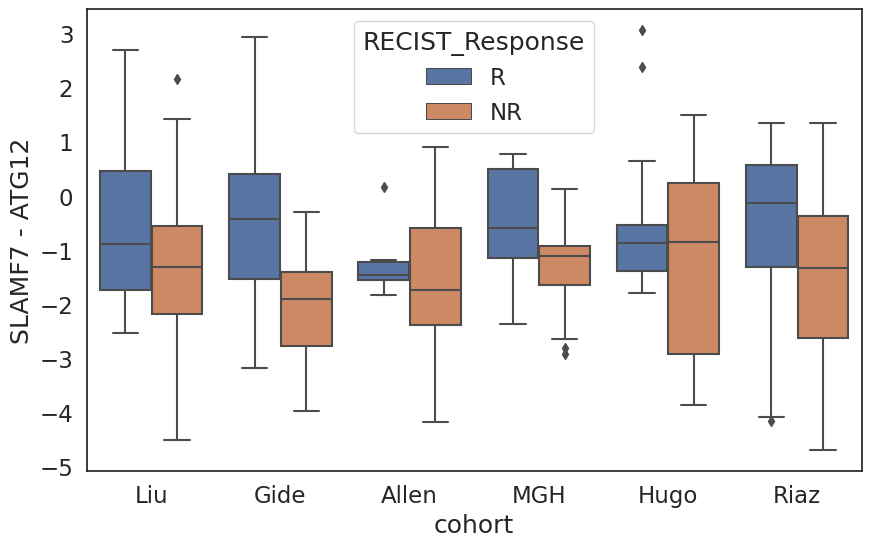

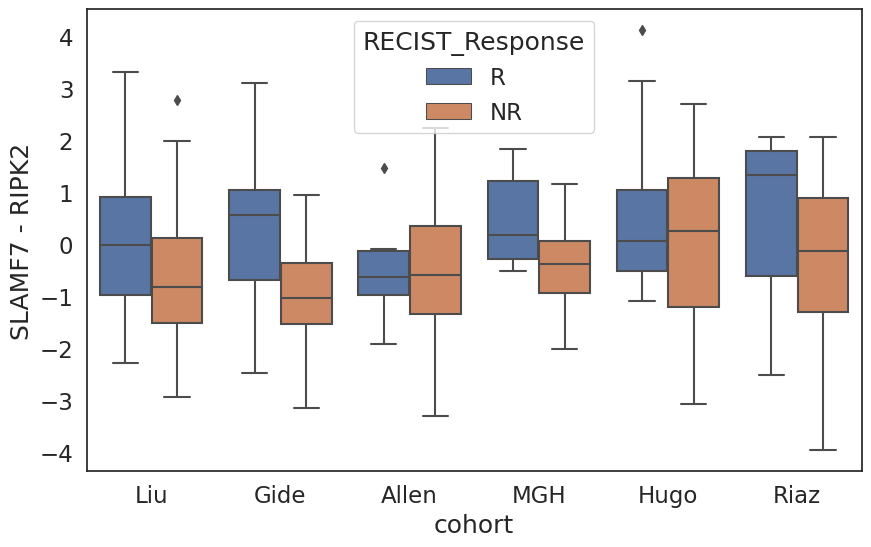

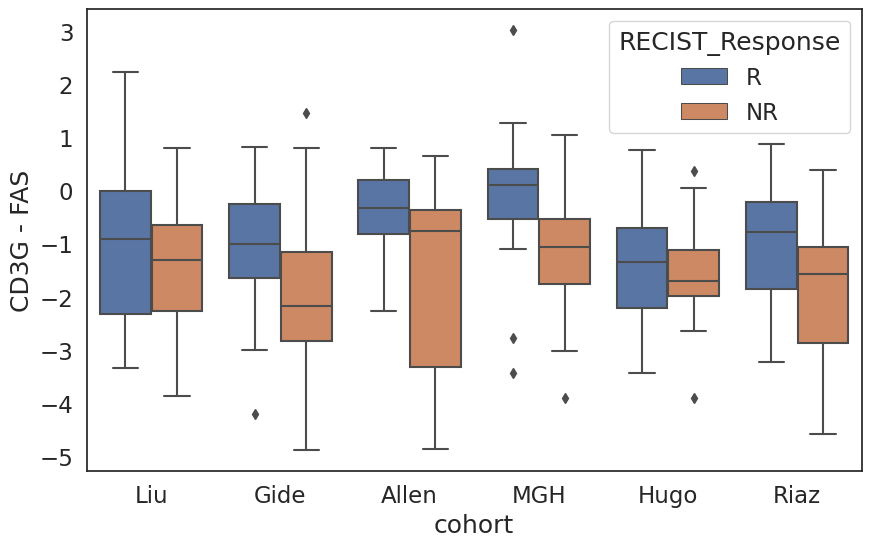

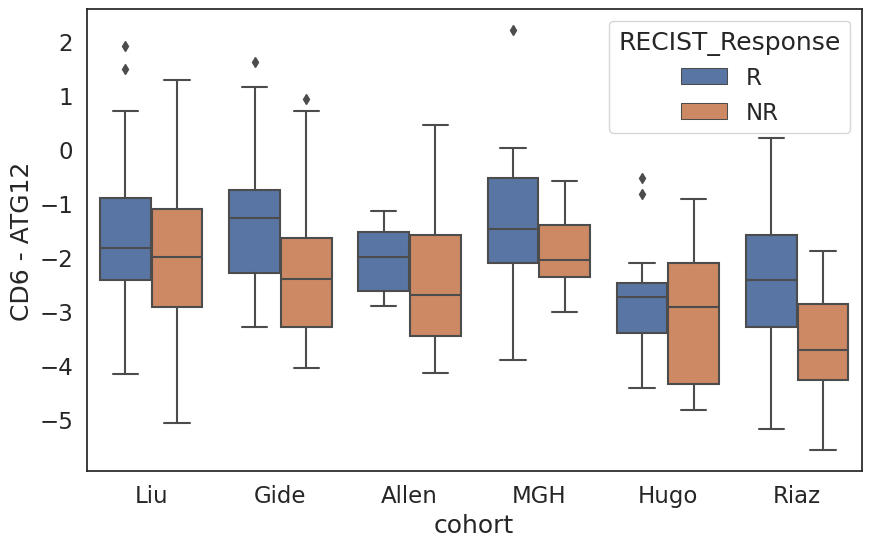

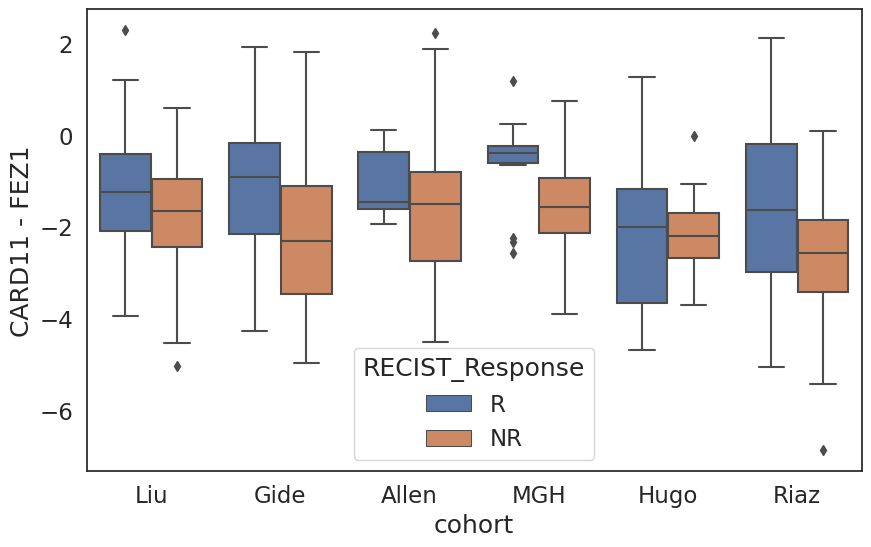

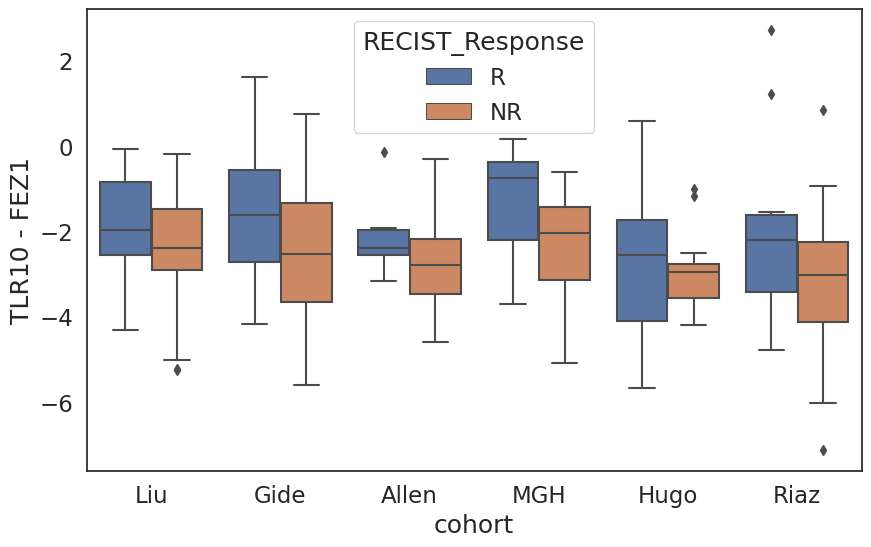

In [19]:
y_col = 'RECIST_Response'
for mk in df1.index[:10]:
    marker = mk.split(' - ')
    cohort_label = itrp_patient[['cohort', y_col]]
    pc = pairwise_combination(combination_pairs = [marker])
    marker_feature = pc.fit(itrp_tpm).transform()
    
    fname = marker_feature.columns[0]
    dfpp = marker_feature.join(cohort_label)
    dfpp = dfpp.dropna()
    fig,ax = plt.subplots(figsize=(10, 6))
    sns.boxplot(dfpp, y = fname, x = 'cohort', hue = y_col, ax=ax)
    roc = dfpp.groupby('cohort').apply(lambda dfxy:Xy_score(dfxy[[fname, y_col]], y_col, method='roc', n_jobs=6))
    prc = dfpp.groupby('cohort').apply(lambda dfxy:Xy_score(dfxy[[fname, y_col]], y_col, method='prc', n_jobs=6))
    roc.join(prc)

In [9]:
marker = ('IKZF3', 'CD200R1') #MAP4K1 - AGER   - 
y_col = 'Freeman_response'
cohort_label = itrp_patient[['cohort', y_col]]
pc = pairwise_combination(combination_pairs = [marker])
marker_feature = pc.fit(itrp_tpm).transform()

fname = marker_feature.columns[0]
dfpp = marker_feature.join(cohort_label)
dfpp = dfpp.dropna()
sns.boxplot(dfpp, y = fname, x = 'cohort', hue = y_col)
roc = dfpp.groupby('cohort').apply(lambda dfxy:Xy_score(dfxy[[fname, y_col]], y_col, method='roc', n_jobs=6))
prc = dfpp.groupby('cohort').apply(lambda dfxy:Xy_score(dfxy[[fname, y_col]], y_col, method='prc', n_jobs=6))
roc.join(prc)

KeyError: 'IKZF3'

100%|##########| 1/1 [00:00<00:00, 1030.04it/s]


,,roc,prc
cohort,gene_name,,
Allen,tmb.wang,0.686391,0.511187
Hugo,tmb.wang,0.612179,0.639102
Liu,tmb.wang,0.570399,0.466306
MGH,tmb.wang,0.657143,0.382703
Riaz,tmb.wang,0.559722,0.225714


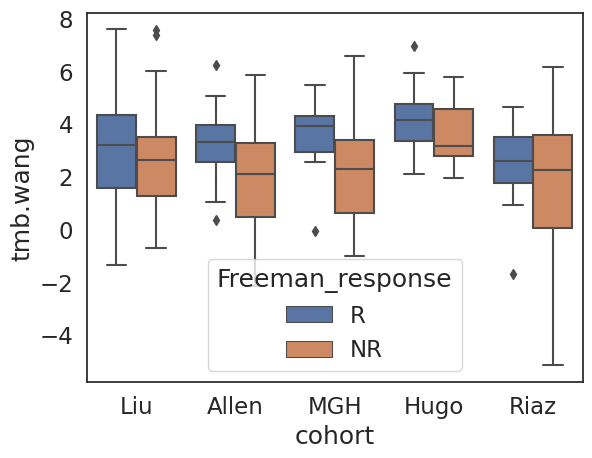

In [66]:
y_col = 'Freeman_response'
marker_feature = itrp_patient[['tmb.wang']]
cohort_label = itrp_patient[['cohort', y_col]]
fname = marker_feature.columns[0]
dfpp = marker_feature.join(cohort_label)
dfpp = dfpp.dropna()
sns.boxplot(dfpp, y = fname, x = 'cohort', hue = y_col)
roc = dfpp.groupby('cohort').apply(lambda dfxy:Xy_score(dfxy[[fname, y_col]], y_col, method='roc', n_jobs=6))
prc = dfpp.groupby('cohort').apply(lambda dfxy:Xy_score(dfxy[[fname, y_col]], y_col, method='prc', n_jobs=6))
roc.join(prc)

100%|##########| 1/1 [00:00<00:00, 1203.19it/s]


,,roc,prc
cohort,gene_name,,
Allen,tmb.wang,0.686391,0.511187
Hugo,tmb.wang,0.612179,0.639102
Liu,tmb.wang,0.570399,0.466306
MGH,tmb.wang,0.657143,0.382703
Riaz,tmb.wang,0.559722,0.225714


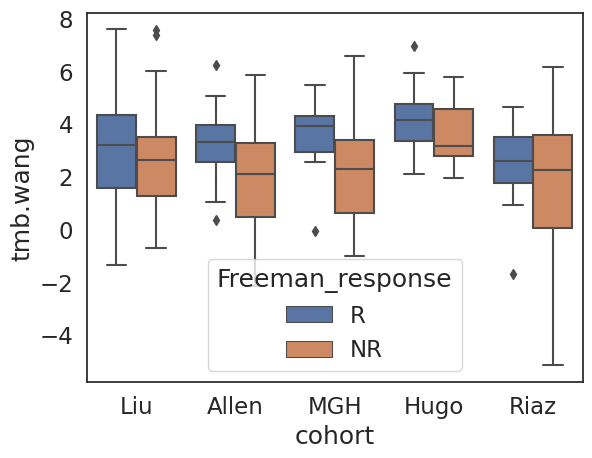

In [39]:
y_col = 'Freeman_response'
marker_feature = itrp_patient[['tmb.wang']]
cohort_label = itrp_patient[['cohort', y_col]]
fname = marker_feature.columns[0]
dfpp = marker_feature.join(cohort_label)
dfpp = dfpp.dropna()

sns.boxplot(dfpp, y = fname, x = 'cohort', hue = y_col)
roc = dfpp.groupby('cohort').apply(lambda dfxy:Xy_score(dfxy[[fname, y_col]], y_col, method='roc', n_jobs=6))
prc = dfpp.groupby('cohort').apply(lambda dfxy:Xy_score(dfxy[[fname, y_col]], y_col, method='prc', n_jobs=6))
roc.join(prc)

100%|##########| 1/1 [00:00<00:00, 1033.84it/s]


,,roc,prc
cohort,gene_name,,
Allen,PDCD1,0.569124,0.189959
Gide,PDCD1,0.764773,0.791750
Hugo,PDCD1,0.523810,0.508611
Liu,PDCD1,0.512044,0.421474
MGH,PDCD1,0.482143,0.452914
Riaz,PDCD1,0.647436,0.403527


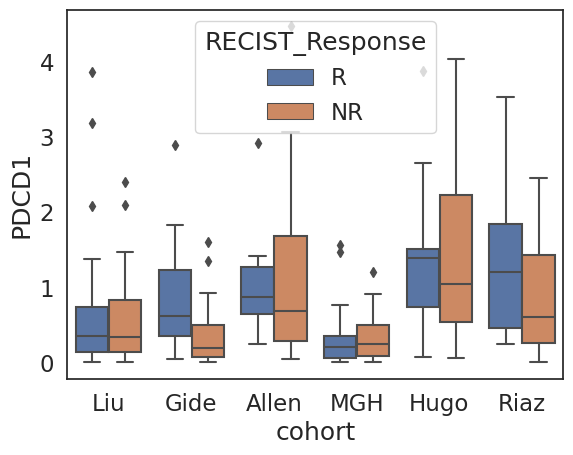

In [42]:
y_col = 'RECIST_Response'
marker_feature = itrp_tpm[['PDCD1']]
cohort_label = itrp_patient[['cohort', y_col]]
fname = marker_feature.columns[0]
dfpp = marker_feature.join(cohort_label)
dfpp = dfpp.dropna()
sns.boxplot(dfpp, y = fname, x = 'cohort', hue = y_col)
roc = dfpp.groupby('cohort').apply(lambda dfxy:Xy_score(dfxy[[fname, y_col]], y_col, method='roc', n_jobs=6))
prc = dfpp.groupby('cohort').apply(lambda dfxy:Xy_score(dfxy[[fname, y_col]], y_col, method='prc', n_jobs=6))
roc.join(prc)

100%|##########| 1/1 [00:00<00:00, 868.39it/s]


,,roc,prc
cohort,gene_name,,
Allen,CTLA4 - TNFSF4,0.692308,0.454082
Gide,CTLA4 - TNFSF4,0.704509,0.797291
Hugo,CTLA4 - TNFSF4,0.511905,0.513605
Liu,CTLA4 - TNFSF4,0.561715,0.519186
MGH,CTLA4 - TNFSF4,0.455357,0.353994
Riaz,CTLA4 - TNFSF4,0.578049,0.275657


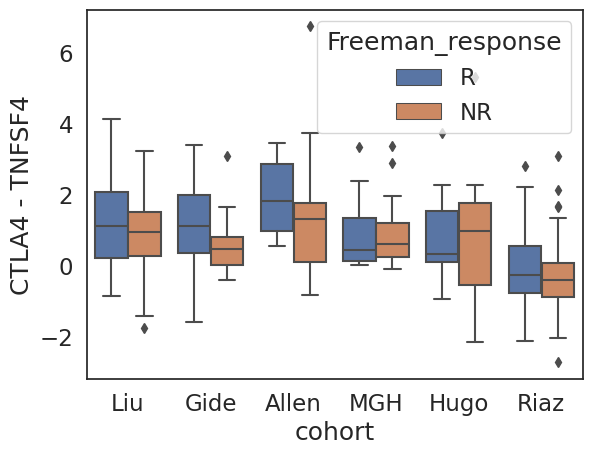

In [44]:
marker = ('CTLA4', 'TNFSF4') #MAP4K1 - AGER
y_col = 'Freeman_response'
cohort_label = itrp_patient[['cohort', y_col]]
pc = pairwise_combination(combination_pairs = [marker])
marker_feature = pc.fit(itrp_tpm).transform()

fname = marker_feature.columns[0]
dfpp = marker_feature.join(cohort_label)
dfpp = dfpp.dropna()
sns.boxplot(dfpp, y = fname, x = 'cohort', hue = y_col)
roc = dfpp.groupby('cohort').apply(lambda dfxy:Xy_score(dfxy[[fname, y_col]], y_col, method='roc', n_jobs=6))
prc = dfpp.groupby('cohort').apply(lambda dfxy:Xy_score(dfxy[[fname, y_col]], y_col, method='prc', n_jobs=6))
roc.join(prc)

In [ ]:
CD274 (PD-L1) expression, GEP, CYT, IMPRES, TIDE, and MHCII.7